# Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Consider a narrowbnad multipath communication channel with no line-of-sight

In [2]:
class JakesModel:
    def __init__(self, N, f_d):
        # Initial phases
        self.a_m = np.random.uniform(0, 2 * np.pi, size=(N, 1))
        self.b_m = np.random.uniform(0, 2 * np.pi, size=(N, 1))
        # Angle of arrivals
        # self.aoa = np.random.uniform(0, 2 * np.pi, size=(N, 1))
        self.aoa = np.arange(0, 2 * np.pi, 2 * np.pi / N).reshape(N, 1)  # No line of sight
        self.N = N
        self.f_d = f_d

    def get(self, t):
        # Keep in mind the numpy broadcasting rules!
        # https://numpy.org/doc/stable/user/basics.broadcasting.html
        re = np.cos(2 * np.pi * self.f_d * np.cos(self.aoa) * t + self.a_m)
        im = np.sin(2 * np.pi * self.f_d * np.cos(self.aoa) * t + self.b_m)
        return np.sum(re + 1j * im, axis=0) / np.sqrt(self.N)

2. Consider a slotted wireless channel: a base station sends a data to only one mobile device using a frame of length $T$ The frame length equals to $N$ independent chnnel uses. Consider an optimal code, that operates at Shannon's limit. Thus, the number of bits transmitted within a single frame is
$$
R = TB\log_2{\left(1 + \frac{S}{N}\right)}, \quad B = \frac{1}{\Delta t} \Rightarrow R = N\log_2{\left(1 + \frac{S}{N}\right)}
$$
2. Consider a base station communicating with multiple mobile devices using time-division multiplexing, when the base-station is able to send a frame to the only mobile device
3. Let the Doppler frequency being small w.r.t. transmittion time
$$
\frac{1}{T} \ll \frac{v}{\lambda}
$$

Note that the channel realizations between a base station and mobile devices are independent

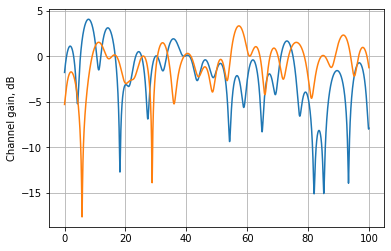

In [4]:
T = 1 # transmission time
f_d = 0.1 # Doppler frequency
n_paths = 100 # The number of paths in Jakes model
n_users = 2  # The number of users in the system
channels = [JakesModel(100, f_d) for i in range(n_users)]


t = np.arange(0, 100, 0.001)

plt.figure()
for i in range(n_users):
    plt.plot(t, 10 * np.log10(np.abs(channels[i].get(t))))
plt.grid()
plt.ylabel('Channel gain, dB')
plt.show()


As one can see, the channel conditions differ for different users. The task of the base station is to perform the scheduling: select a single user and transmit data to it. The performance measure may be:
* the sum data rate
* the worst 10% users data rate

The task for the current assignment is the following
1. Estimate different scheduling strategies: "round robbin" and "best channel conditions"
2. Evaluate the sum spectral efficiency given these two strategies (bit/s/Hz) for different number of users
3. Compare both strategies with the AWGN that has the same time-averaged SNR
4. Evaluate the "fairness" of each scheduling strategy